# CH05 오차역전파법
수치미분은 느림 따라서 조금더 효율적으로 계싼하는 오차역전파의 필요성
오차역전파 두가지를 통한 이해
* 그래프
* 수식

## 5.1 계산그래프

Computaional Graph 계산 그래프 : 이름 그대로 계산과정을 표현한 그래프  
복수의 노드와 에자(노드와 노드 사이의 직선)로 표현  

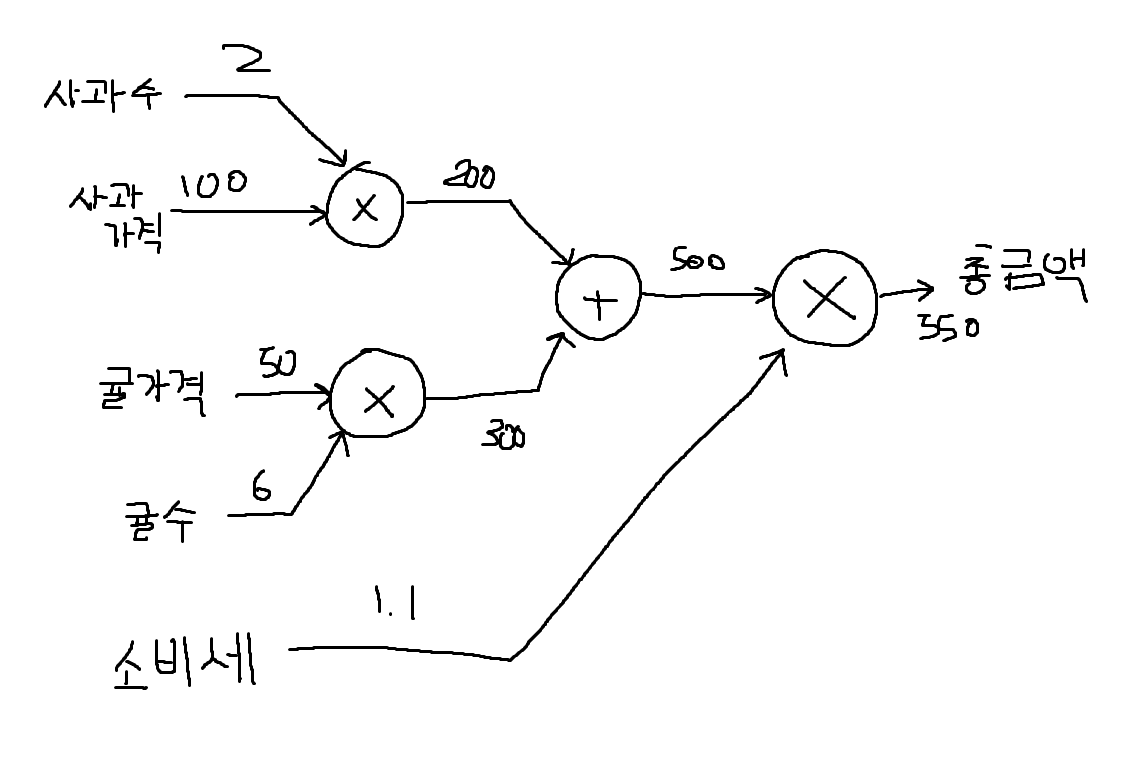

100원짜리 사과 2개와 50원짜리 귤 6개를 소비세 10%로 구매하였을때 총 금액  
이처럼 계산을 왼쪽에서 오른쪽으로 진행하는 단례를 **순전파**라 부름  
계산 그래프의 출발점부터 종착점으로의 전파  
이때 반대 방향으로 진행하는 것을 **역전파**라함

**국소적 계산**  
계산 그래프의 특징 : 국소적 계산을 전파함  

국소적 계산 : 자지 자신과 직접적으로 관계된 작음 범위만 계산  
위의 예시에서 여러 식품을 구매하더라도 추가적으로 무언가(감자)를 산다했을 때  
감자와 그 외의 물품 값을 더하는 계산은 500 + (감자가격) 만 계산하면 되고  
500이 어떻게 나왔는지는 신경쓰지 않는다는 뜻  

이처럼 계산 그래프는 전체 계산이 복잡한 것과는 별개로 해당노드의 국소적 계산에 집중  

**계산그래프의 이점**
* 국소적 계산 : 전체가 복잡해도 작은 것에만 집중하여 문제가 단순화 됨
* **미분을 효과적을 수행** : 순전파와 역전파를 이용해 각 변수의 미분을 효율적으로 구할 수 있음   
  역전파는 순전파와 반대 방향의 화살표로 그림  
이는 국소적 미분을 전달하고 그 미분 값은 화살표 아래에 적음  
역전파는 오른쪽에서 왼쪽으로 진행하며 미분값 전달 
1 -> 1.1 -> 2.2 를 얻을 수 있으며 사과가 1원이 오르면  
  최종금액은 2.2원이 오른다는 인사이트 얻을 수 있음  
이처럼 소비세에 대한 지불금액의 미분이나 사과 개수에 대한 지불 금액의 미분도 구할 수 있음  

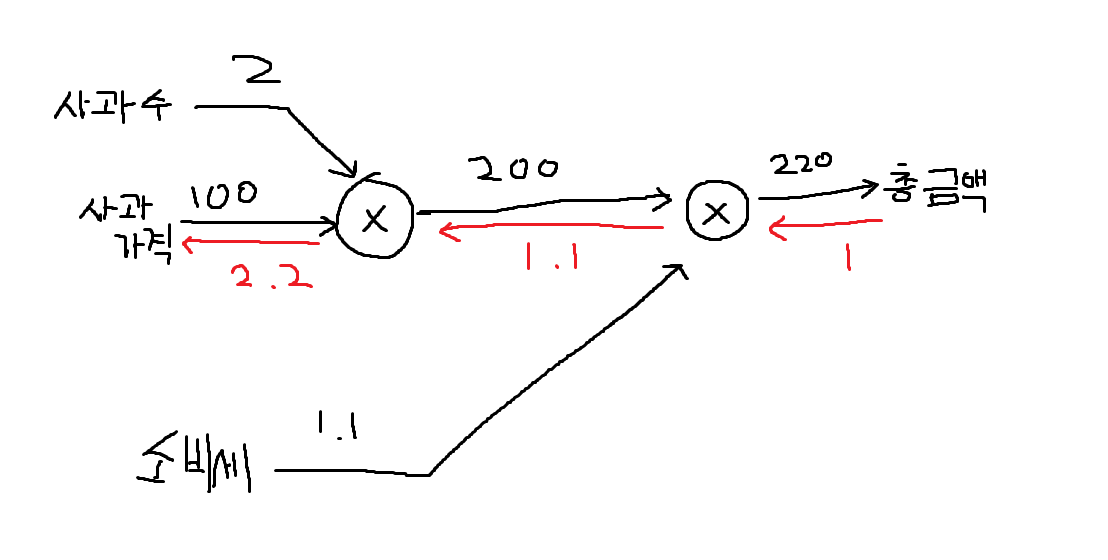

## 5.2 연쇄법칙

역전파가 국소적인 미분을 전달하는 원리는 연쇄법칙  
신호 E (상류에서 전달된 값)에 국소적 미분$(\frac{\partial y}{\partial x})$을 곱한 후 다음 노드로 전달하여 역전파 계산  

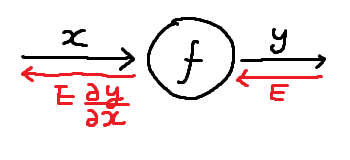

**연괘법칙이란?**  
합겅합수의 미분에 관한 성질 중 하나로 다음과 같이 정의 됨  
**합성함수의 미분은 합성함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다**  
$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x} $$

**연쇄법칙과 계산 그래프**  
$ z = (x+y)^2$ 이라는 식이 있다고 하자  
이는 다음과 같이 분리가 가능하다  
$ z = t^2 $  
$ t = x + y $  
이때 x가 z에 얼마나 영향을 미치는지 알고싶다면 $\frac{\partial z}{\partial x}$를 알아야함  
이를 연쇄법칙의 계산 그래프에서 나타내면 다음 그림과 같음

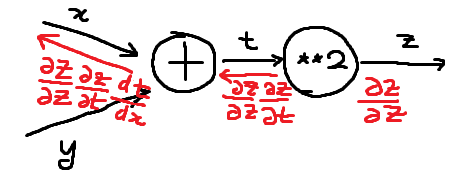

즉, $\frac{\partial z}{\partial z} = 1 $  
$\frac{\partial z}{\partial z} \frac{\partial z}{\partial t} = 1 * 2t = 2(x+y)$  
$\frac{\partial z}{\partial z} \frac{\partial z}{\partial t}\frac{\partial t}{\partial x} = 2(x+y)*1$

## 5.3 역전파

수식으로 역전파 설명  

### 덧셈 노드의 역전파

식 : $z = x + y$을 대상으로 역전파  
$$\frac{\partial z}{\partial x} = 1$$  
$$\frac{\partial z}{\partial y} = 1$$  
이 때 상류에서 전해진 미분을 $\frac{\partial L}{\partial z}$ 라하면 결과 적으로는  
x의 에자는 $\frac{\partial L}{\partial z} * 1$  
y의 에자는 $\frac{\partial L}{\partial z} * 1$  
을 각각 하류로 흘려보냄  

ex)  
10 + 5 = 10이라는 계산식이 있을 때(무관함)  
상류에서 1.7이 흘러온다면 각각 1.7 1.7을 하류로 흘러 보냄

즉, **덧셈노드는 역전파 입력신호를 다음노드로 출력할 뿐이기에 값을 그대로 하류노드로 전달한다**

### 곱셈 노드의 역전파

식 : $z = xy$을 대상으로 역전파  
$$\frac{\partial z}{\partial x} = y$$  
$$\frac{\partial z}{\partial y} = x$$  
이 때 상류에서 전해진 미분을 $\frac{\partial L}{\partial z}$ 라하면 결과 적으로는  
x의 에자는 $\frac{\partial L}{\partial z} * y$  
y의 에자는 $\frac{\partial L}{\partial z} * x$  
을 각각 하류로 흘려보냄  

ex)  
10 * 5 = 50이라는 계산식이 있을 때  
상류에서 1.7이 흘러온다면 각각 8.5 17을 하류로 흘러 보냄 

즉, **곱셈노드는 역전파 입력신호에 서로바꾼 값을 곱해 하류노드로 전달한다**

## 5.4 단순한 계층 구현하기

앞서 보았던 사과 쇼핑의 예를 구현  
덧셈노드 : AddLayer()  
곱셈노드 : MulLayer()  
순전파 : forward()  
역전파 : backward()

In [6]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self,x,y):
        self.x = x
        self.y = y
        out = x*y

        return out

    def backward(self, dout):
        dx = dout * self.y # 미분 직적 수행잉 아닌 이미 계산된 식 사용
        dy = dout * self.x

        return dx,dy

순전파

In [7]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


역전파

In [9]:
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


덧셈계층  
역전파에서 사용되지 않으므로 __init__ 초기화가 필요 없음

In [10]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self,x,y):
        out = x+y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx,dy

두 계층을 합쳐서 사과와 귤을 사는 상황을 구현

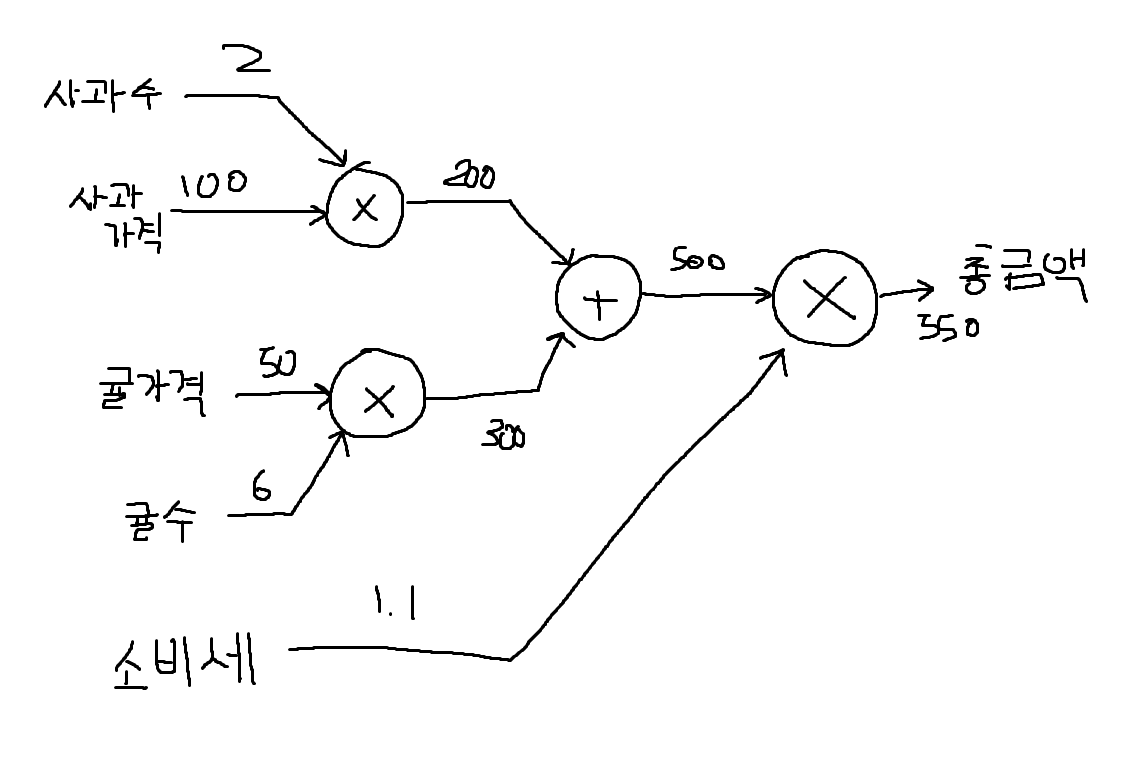

In [13]:
apple = 100
apple_num = 2
tangerine = 50
tangerine_num = 6
tax = 1.1

mul_apple_layer = MulLayer()
mul_tangerine_layer = MulLayer()
add_apple_tangerine_layer = AddLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple,apple_num)
tangerine_price = mul_tangerine_layer.forward(tangerine,tangerine_num)
price = add_apple_tangerine_layer.forward(apple_price, tangerine_price)
cost = mul_tax_layer.forward(price,tax)

dprice = 1
dprice, dtax = mul_tax_layer.backward(dprice)
dapple_price, dtangerine_price = add_apple_tangerine_layer.backward(price)
dtangerine, dtangerine_num = mul_tangerine_layer.backward(dtangerine_price)
dapple, dtangerine_num = mul_apple_layer.backward(dapple_price)

print(cost)
print(dapple_num, dapple, dtangerine, dtangerine_num, dtax)

550.0
110.00000000000001 1000 3000 50000 500
